<a href="https://colab.research.google.com/github/abirakm/Texas-Department-of-Criminal-Justice-Record/blob/main/02_EAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os, sys 
#to be able to interact with Google Drive's operating system
from google.colab import drive 
#drive is a module that allows us use Python to interact with google drive
drive.mount('/content/gdrive') 
#Change the path to the directory where the module is located
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')


Mounted at /content/gdrive


In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import squarify as sqf
%matplotlib inline

In [5]:
# Read Clean Data and replace space in column name with a underscore
TDCJ_Data = pd.read_csv("https://raw.githubusercontent.com/abirakm/Texas-Department-of-Criminal-Justice-Record/main/TDCJ_Data_clean.csv")
TDCJ_Data.head()

,Inmate_Type,Gender,Race,County,Offense,Sentence_Years,Offense_Description,Case_Duration_Days,Sentence_Year,Offense_Year,Age_at_Offence,FIPS,TOT_POP,MalePCT,BlackPCT,HispanicPCT
0,ID,M,B,Dallas,Property,21 to 25 Years,BURGLARY OF HABITATION,79.0,1983,1983,73,48113.0,2453843.0,49.513966,23.0,38.88
1,ID,M,B,Dallas,Property,31 to 40 Years,BURGLARY OF HABITATION,50.0,1992,1992,73,48113.0,2453843.0,49.513966,23.0,38.88
2,ID,M,B,Dallas,Property,26 to 30 Years,BURGLARY OF HABITATION,29.0,1985,1985,72,48113.0,2453843.0,49.513966,23.0,38.88
3,ID,M,H,Bexar,Property,Life,BURGLARY OF HABITATION,81.0,1986,1986,71,48029.0,1785704.0,49.168395,8.0,59.06
4,ID,M,W,Bell,Property,Life,BURGLARY OF HABITATION,218.0,1981,1980,69,48027.0,323037.0,49.874473,22.0,22.71


Let's Plot Bar chart for Categorical Data

In [6]:
TDCJ_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91148 entries, 0 to 91147
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Inmate_Type          91148 non-null  object 
 1   Gender               91148 non-null  object 
 2   Race                 91148 non-null  object 
 3   County               91148 non-null  object 
 4   Offense              91148 non-null  object 
 5   Sentence_Years       91148 non-null  object 
 6   Offense_Description  91148 non-null  object 
 7   Case_Duration_Days   91148 non-null  float64
 8   Sentence_Year        91148 non-null  int64  
 9   Offense_Year         91148 non-null  int64  
 10  Age_at_Offence       91148 non-null  int64  
 11  FIPS                 91037 non-null  float64
 12  TOT_POP              91037 non-null  float64
 13  MalePCT              91037 non-null  float64
 14  BlackPCT             91037 non-null  float64
 15  HispanicPCT          91037 non-null 

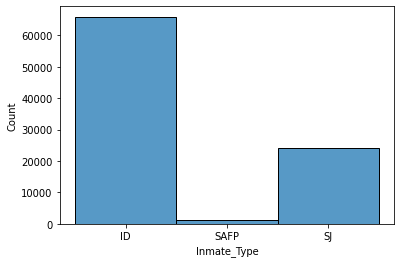

In [7]:
sns.histplot(TDCJ_Data["Inmate_Type"].sort_values())

Inmate Type ID is the highest compared to other type

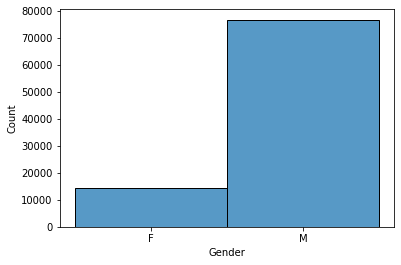

In [8]:
sns.histplot(TDCJ_Data["Gender"].sort_values())

The number of male inmates are higher than the female inmates

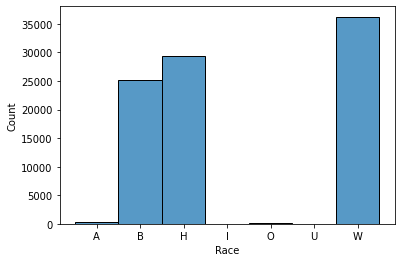

In [9]:
sns.histplot(TDCJ_Data["Race"].sort_values())

The number of white inmates are higher when compared with other race. However, 

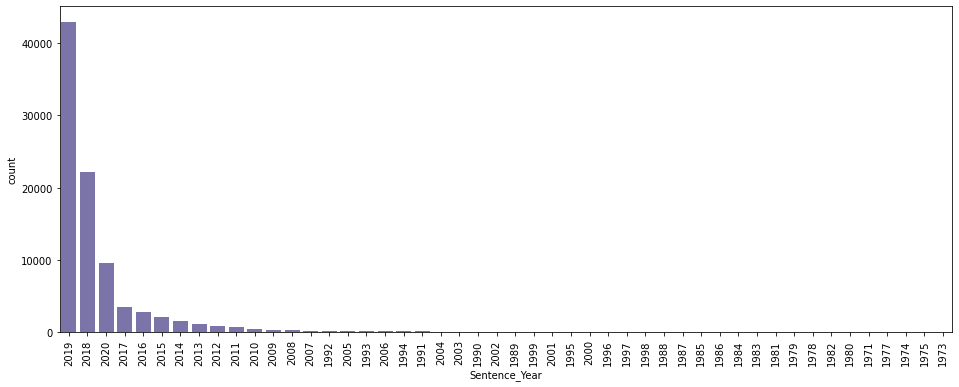

In [25]:
plt.figure(figsize=(16, 6))
chart = sns.countplot(data = TDCJ_Data,
                      x = 'Sentence_Year',
                      order = TDCJ_Data['Sentence_Year'].value_counts().index,    
    color = '#756bb1');

chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
chart;

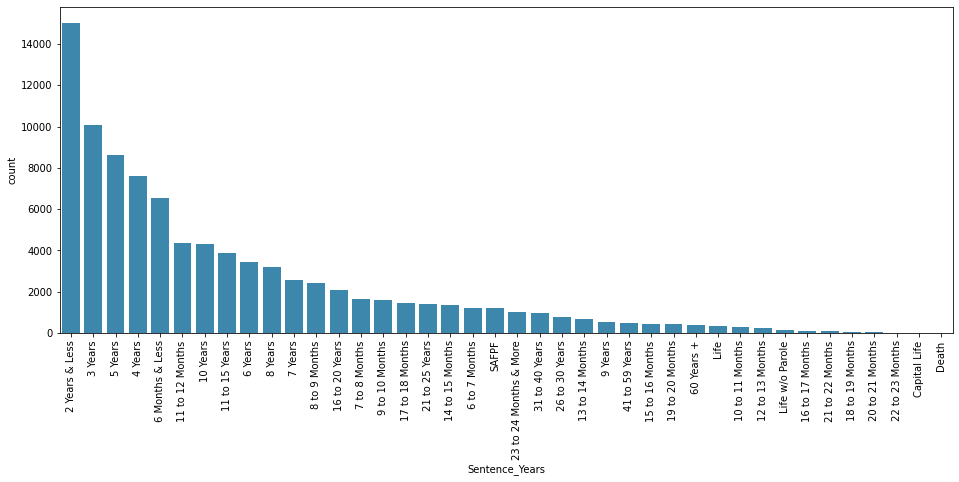

In [23]:
plt.figure(figsize=(16, 6))
chart = sns.countplot(data = TDCJ_Data,
                      x = 'Sentence_Years',
                      order = TDCJ_Data['Sentence_Years'].value_counts().index,    
    color = '#2b8cbe');

chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
chart;

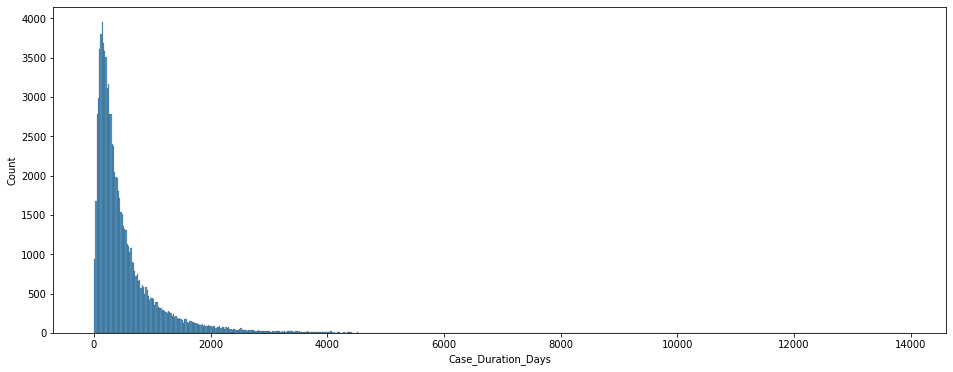

In [27]:
plt.figure(figsize=(16, 6))
sns.histplot(TDCJ_Data["Case_Duration_Days"].sort_values())

In [ ]:
# Number of Inmate and Other Socio Demographic Info by County
InmateByCounty = TDCJ_Data.groupby('County').agg(
   Number_of_inmate = pd.NamedAgg('County','count') ,
   TOT_POP  = pd.NamedAgg('TOT_POP','mean') ,
   MalePCT  = pd.NamedAgg('MalePCT','mean') ,
   BlackPCT  = pd.NamedAgg('BlackPCT','mean') ,
   HispanicPCT  = pd.NamedAgg('HispanicPCT','mean') ,
).reset_index()


In [ ]:
# Load Continent GeoJSON File to plot
CountyData =  gpd.read_file("https://raw.githubusercontent.com/abirakm/Texas-Department-of-Criminal-Justice-Record/main/Texas%20Counties%20Map.geojson")

#Simplify The Geometry to Reduce Plot Size
CountyData['geometry'] = CountyData['geometry'].simplify(tolerance = .05, preserve_topology=True)
#Merge GeoJSON and Summary Data
CountyData = CountyData.merge(InmateByCounty, left_on = 'name', right_on='County')


In [ ]:
CountyData.explore(
     column="Number_of_inmate", # make choropleth based on "Number_of_inmate" column
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     k=10, # use 10 bins
     cmap="YlOrRd",
     style_kwds=dict(color="black"), # use black outline
     tooltip=["name","Number_of_inmate"],
     name = "Number_of_inmate"
    )


In [ ]:
CountyData.explore(
     column="TOT_POP", # make choropleth based on "TOT_POP" column
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     k=10, # use 10 bins
     cmap="YlOrRd",
     style_kwds=dict(color="black"), # use black outline
     tooltip=["name","TOT_POP"],
     name= "TOT_POP"
    )


In [ ]:
CountyData.explore(
     column="MalePCT", # make choropleth based on "MalePCT" column
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     k=10, # use 10 bins
     cmap="YlOrRd",
     style_kwds=dict(color="black"), # use black outline
     tooltip=["name","MalePCT"],
     name= "MalePCT"
    )


In [ ]:
CountyData.explore(
     column="BlackPCT", # make choropleth based on "BlackPCT" column
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     k=10, # use 10 bins
     cmap="YlOrRd",
     style_kwds=dict(color="black"), # use black outline
     tooltip=["name","BlackPCT"],
     name= "BlackPCT"
    )


In [ ]:
CountyData.explore(
     column="HispanicPCT", # make choropleth based on "HispanicPCT" column
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     k=10, # use 10 bins
     cmap="YlOrRd",
     style_kwds=dict(color="black"), # use black outline
     tooltip=["name","HispanicPCT"],
     name= "HispanicPCT"
    )


The Map shows that there is a strong corelation between population and Number of Inamtes. The Maps show that the Harris County has maximum number of Inmate. And Other Majors Cityes such as Dallas, San Anotnio have most number of Inmates. Also an iteresting observation is that the percent of black bpluation is higer in eastern countys and percent of hispanic poluation is higher in the US Mexico border area.